In [246]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from statsmodels.api import OLS, add_constant

In [247]:
BRAND = "mazda"
FILENAME = BRAND + "_cars.csv"

In [248]:
filepath = Path(FILENAME)
df = pd.read_csv(filepath, encoding="utf-16")

print(df.shape)
df.head()

(1184, 11)


,name,price,km_age,year,engine_volume,engine_power,fuel_type,gearbox,car_body,transmission_type,color
0,Mazda CX-9 II Рестайлинг,6180000,0,2024,2.5,231,бензин,автомат,внедорожник 5 дв.,полный,NaN
1,Mazda CX-9 II,3000000,163112,2019,2.5,231,бензин,автомат,внедорожник 5 дв.,полный,синий
2,Mazda CX-5 II Рестайлинг,5550000,0,2023,2.5,196,бензин,автомат,внедорожник 5 дв.,полный,NaN
3,Mazda CX-5 II,2611000,102107,2019,2.0,150,бензин,автомат,внедорожник 5 дв.,полный,коричневый
4,Mazda CX-5 II,3127000,72000,2020,2.0,150,бензин,автомат,внедорожник 5 дв.,полный,чёрный


In [249]:
df.drop("name", axis=1, inplace=True)

df.head()

,price,km_age,year,engine_volume,engine_power,fuel_type,gearbox,car_body,transmission_type,color
0,6180000,0,2024,2.5,231,бензин,автомат,внедорожник 5 дв.,полный,NaN
1,3000000,163112,2019,2.5,231,бензин,автомат,внедорожник 5 дв.,полный,синий
2,5550000,0,2023,2.5,196,бензин,автомат,внедорожник 5 дв.,полный,NaN
3,2611000,102107,2019,2.0,150,бензин,автомат,внедорожник 5 дв.,полный,коричневый
4,3127000,72000,2020,2.0,150,бензин,автомат,внедорожник 5 дв.,полный,чёрный


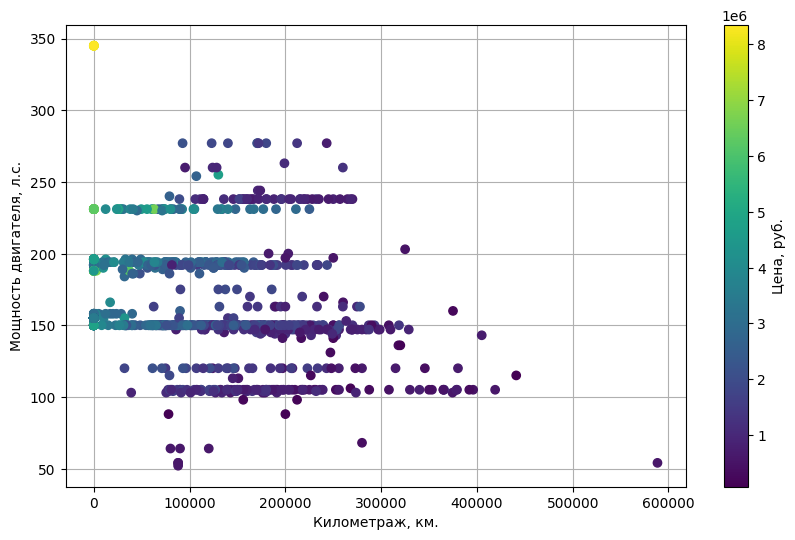

In [250]:
plt.figure(figsize=(10, 6))
plt.scatter(df.km_age, df.engine_power, c=df.price, cmap="viridis", zorder=10)
plt.xlabel("Километраж, км.")
plt.ylabel("Мощность двигателя, л.с.")
plt.colorbar(label="Цена, руб.")
plt.grid(zorder=1)
plt.show()

In [251]:
data = df[["price", "km_age", "engine_power"]]

data

,price,km_age,engine_power
0,6180000,0,231
1,3000000,163112,231
2,5550000,0,196
3,2611000,102107,150
4,3127000,72000,150
...,...,...,...
1179,3495000,0,155
1180,1000000,249000,144
1181,900000,101000,103
1182,940000,220000,238


In [252]:
data.isna().sum()

price           0
km_age          0
engine_power    0
dtype: int64

In [253]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1
outliers = data[((data < (q1 - 1.5 * iqr)) | (data > (q3 + 1.5 * iqr))).any(axis=1)]

outliers

,price,km_age,engine_power
7,7750000,0,345
8,7750000,0,345
19,8350000,0,345
25,6755000,0,231
28,1880000,123003,277
32,8350000,0,345
37,6755000,0,231
55,7980000,27,231
56,6482000,0,231
60,6695000,0,188


In [254]:
data_cleaned = data.drop(outliers.index)

data_cleaned

,price,km_age,engine_power
0,6180000,0,231
1,3000000,163112,231
2,5550000,0,196
3,2611000,102107,150
4,3127000,72000,150
...,...,...,...
1179,3495000,0,155
1180,1000000,249000,144
1181,900000,101000,103
1182,940000,220000,238


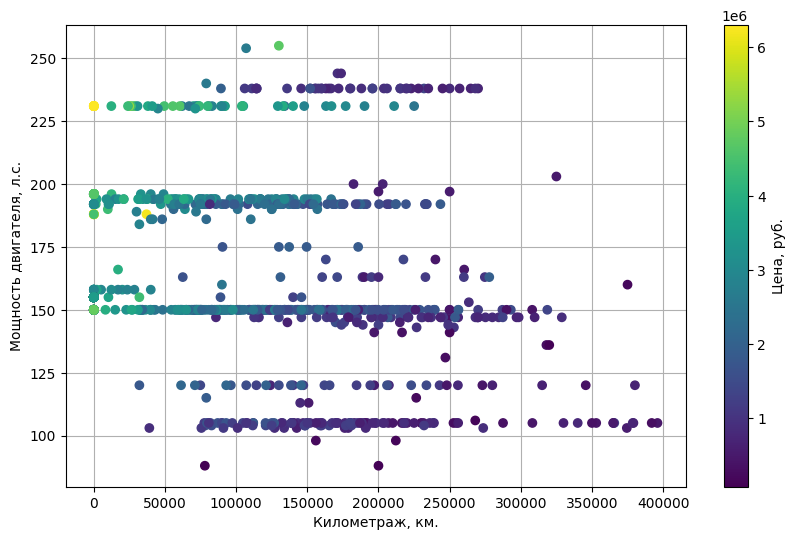

In [255]:
plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned.km_age, data_cleaned.engine_power, c=data_cleaned.price, cmap="viridis", zorder=10)
plt.xlabel("Километраж, км.")
plt.ylabel("Мощность двигателя, л.с.")
plt.colorbar(label="Цена, руб.")
plt.grid(zorder=1)
plt.show()

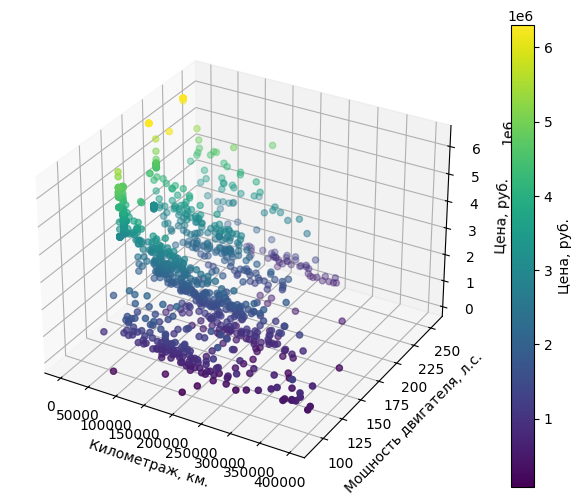

In [256]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data_cleaned['km_age'], data_cleaned['engine_power'], data_cleaned['price'], c=data_cleaned['price'], cmap='viridis')

ax.set_xlabel('Километраж, км.')
ax.set_ylabel('Мощность двигателя, л.с.')
ax.set_zlabel('Цена, руб.')

fig.colorbar(scatter, ax=ax, label='Цена, руб.')
plt.show()

In [257]:
y = data_cleaned.price
y_log = np.log(y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     2231.
Date:                Wed, 18 Dec 2024   Prob (F-statistic):          1.31e-269
Time:                        20:35:00   Log-Likelihood:                -16907.
No. Observations:                1131   AIC:                         3.382e+04
Df Residuals:                    1129   BIC:                         3.383e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.607e+06   3.24e+04    111.226      0.0

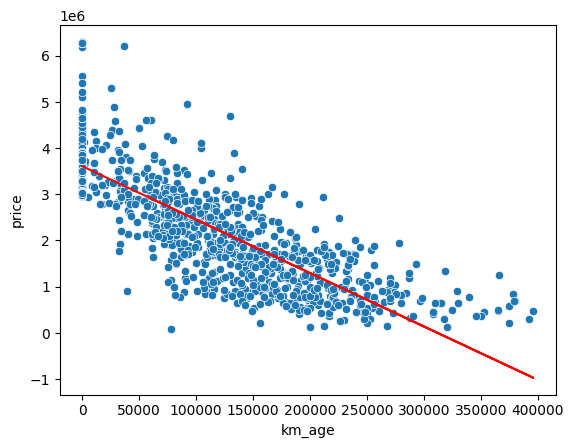

In [258]:
X = add_constant(data_cleaned.km_age)
model = OLS(y, X)
results = model.fit()
print(results.summary())

sns.scatterplot(data=data_cleaned, x="km_age", y="price")
plt.plot(data_cleaned.km_age, results.predict(X), color="red")
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     2355.
Date:                Wed, 18 Dec 2024   Prob (F-statistic):          1.56e-278
Time:                        20:35:01   Log-Likelihood:                -508.23
No. Observations:                1131   AIC:                             1020.
Df Residuals:                    1129   BIC:                             1031.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.1273      0.016    924.497      0.0

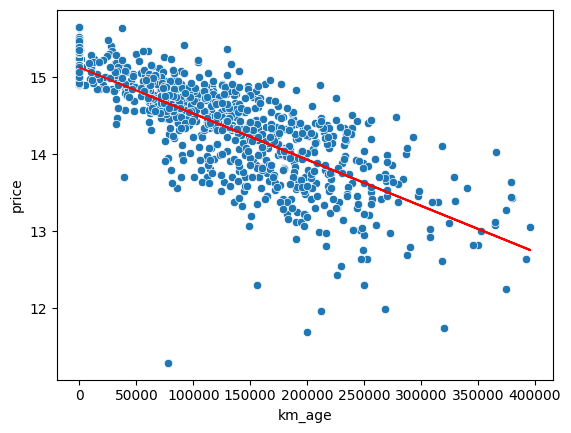

In [259]:
model = OLS(y_log, X)
results = model.fit()
print(results.summary())

sns.scatterplot(x=data_cleaned.km_age, y=y_log)
plt.plot(data_cleaned.km_age, results.predict(X), color="red")
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     155.7
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           1.47e-33
Time:                        20:35:01   Log-Likelihood:                -17451.
No. Observations:                1131   AIC:                         3.491e+04
Df Residuals:                    1129   BIC:                         3.492e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.112e+05   1.79e+05      1.739   

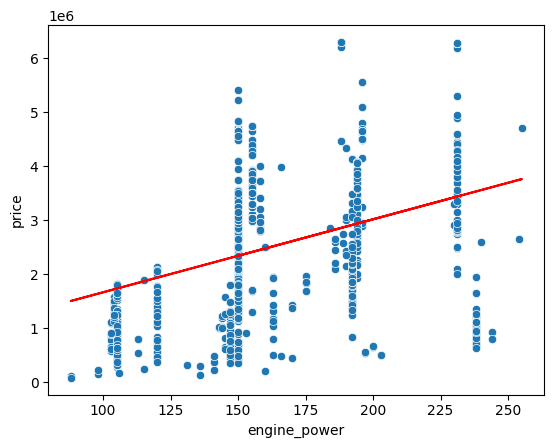

In [260]:
X = add_constant(data_cleaned.engine_power)
model = OLS(y, X)
results = model.fit()
print(results.summary())

sns.scatterplot(data=data_cleaned, x="engine_power", y="price")
plt.plot(data_cleaned.engine_power, results.predict(X), color="red")
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     168.1
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           6.13e-36
Time:                        20:35:01   Log-Likelihood:                -1067.0
No. Observations:                1131   AIC:                             2138.
Df Residuals:                    1129   BIC:                             2148.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           13.3902      0.092    146.309   

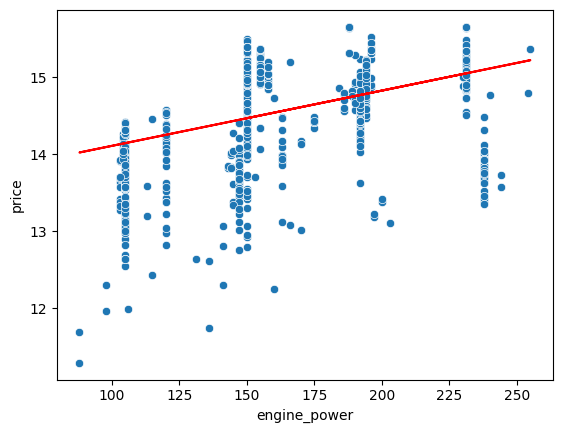

In [261]:
model = OLS(y_log, X)
results = model.fit()
print(results.summary())

sns.scatterplot(x=data_cleaned.engine_power, y=y_log)
plt.plot(data_cleaned.engine_power, results.predict(X), color="red")
plt.show()

In [262]:
X = add_constant(data_cleaned[["km_age", "engine_power"]])
model = OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     1363.
Date:                Wed, 18 Dec 2024   Prob (F-statistic):          1.18e-301
Time:                        20:35:02   Log-Likelihood:                -16829.
No. Observations:                1131   AIC:                         3.366e+04
Df Residuals:                    1128   BIC:                         3.368e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.228e+06   1.11e+05     20.084   

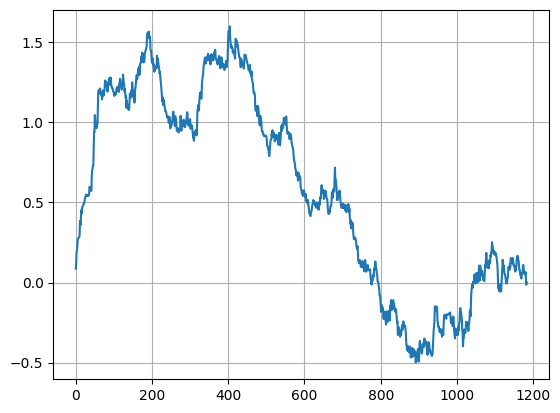

In [263]:
simple_regr_res = y - results.fittedvalues
sum_regr_res=np.cumsum(simple_regr_res)
sigma=np.std(simple_regr_res)
emp_bridge=sum_regr_res/len(sum_regr_res)**0.5/sigma

plt.plot(emp_bridge)
plt.grid()
plt.show()

In [264]:
X = add_constant(data_cleaned[["km_age", "engine_power"]])
model = OLS(y_log, X)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     1479.
Date:                Wed, 18 Dec 2024   Prob (F-statistic):          5.63e-316
Time:                        20:35:02   Log-Likelihood:                -417.66
No. Observations:                1131   AIC:                             841.3
Df Residuals:                    1128   BIC:                             856.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           14.3819      0.055    259.812   

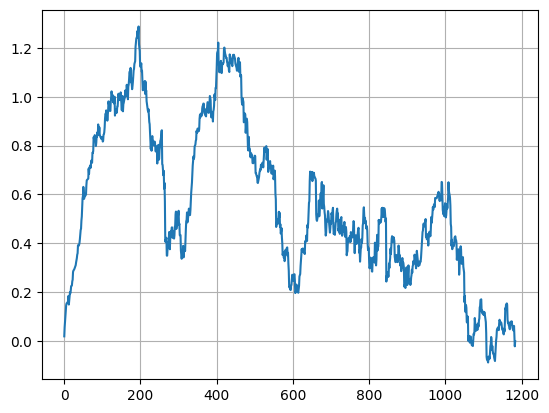

In [265]:
simple_regr_res = y_log - results.fittedvalues
sum_regr_res=np.cumsum(simple_regr_res)
sigma=np.std(simple_regr_res)
emp_bridge=sum_regr_res/len(sum_regr_res)**0.5/sigma

plt.plot(emp_bridge)
plt.grid()
plt.show()

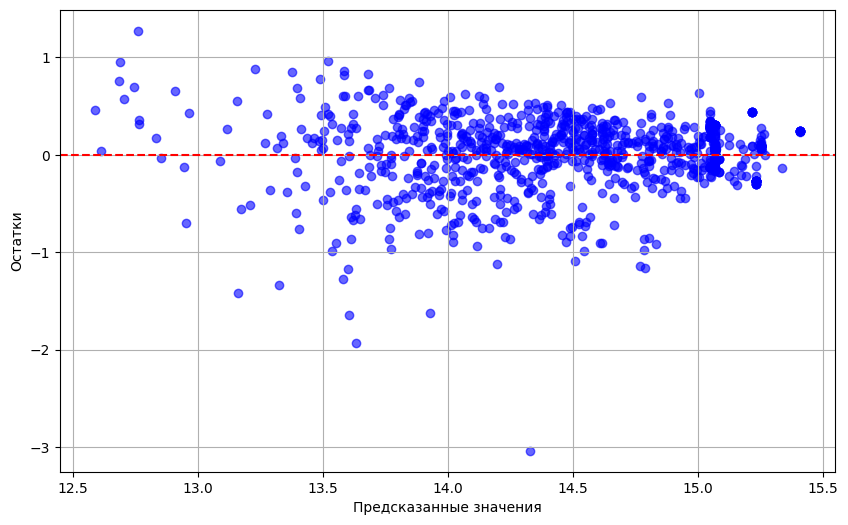

In [266]:
plt.figure(figsize=(10, 6))
plt.scatter(results.fittedvalues, results.resid, c="blue", alpha=0.6)
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.axhline(0, color="red", linestyle="--")
plt.grid()
plt.show()

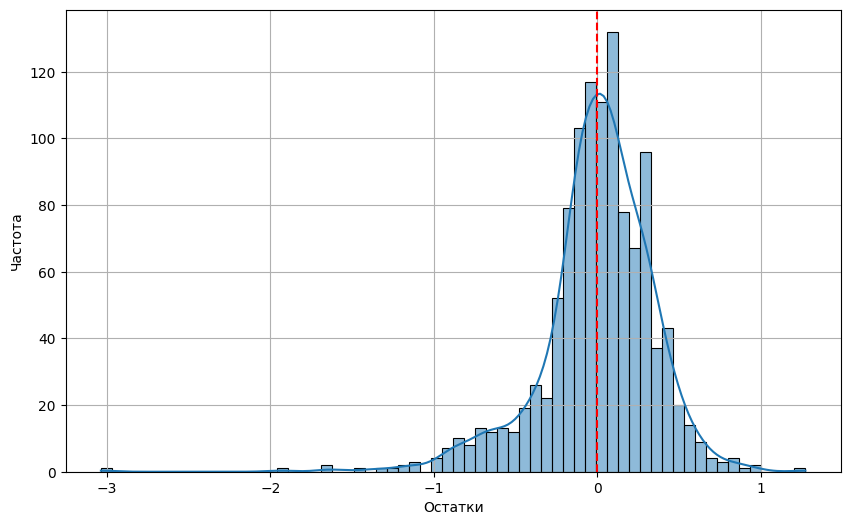

In [267]:
plt.figure(figsize=(10, 6))
sns.histplot(results.resid, kde=True)
plt.xlabel("Остатки")
plt.ylabel("Частота")
plt.axvline(0, color="red", linestyle="--")
plt.grid()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     1479.
Date:                Wed, 18 Dec 2024   Prob (F-statistic):          5.63e-316
Time:                        20:35:03   Log-Likelihood:                -417.66
No. Observations:                1131   AIC:                             841.3
Df Residuals:                    1128   BIC:                             856.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           14.3819      0.055    259.812   

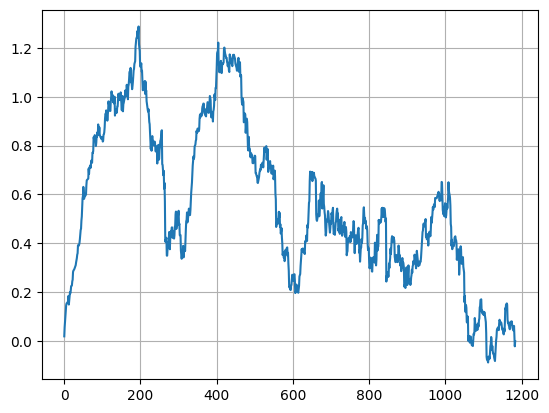

In [268]:
data_sorted = data_cleaned.sort_values(by="km_age", inplace=False)
y_log_ = np.log(data_sorted.price)

X = add_constant(data_sorted[["km_age", "engine_power"]])
model = OLS(y_log_, X)
results = model.fit()
print(results.summary())

simple_regr_res = y_log_ - results.fittedvalues
simple_regr_res.sort_index(inplace=True)
sum_regr_res=np.cumsum(simple_regr_res)
sigma=np.std(simple_regr_res)
emp_bridge = sum_regr_res/len(sum_regr_res)**0.5/sigma

emp_bridge_temp = emp_bridge

plt.plot(emp_bridge)
plt.grid()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     1479.
Date:                Wed, 18 Dec 2024   Prob (F-statistic):          5.63e-316
Time:                        20:35:03   Log-Likelihood:                -417.66
No. Observations:                1131   AIC:                             841.3
Df Residuals:                    1128   BIC:                             856.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           14.3819      0.055    259.812   

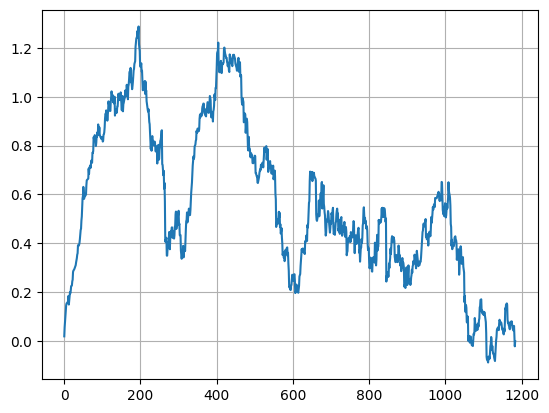

In [269]:
data_sorted = data_cleaned.sort_values(by="engine_power", inplace=False)
y_log_ = np.log(data_sorted.price)

X = add_constant(data_sorted[["km_age", "engine_power"]])
model = OLS(y_log_, X)
results = model.fit()
print(results.summary())

simple_regr_res = y_log_ - results.fittedvalues
simple_regr_res.sort_index(inplace=True)
sum_regr_res = np.cumsum(simple_regr_res)
sigma = np.std(simple_regr_res)
emp_bridge = sum_regr_res / len(sum_regr_res) ** 0.5 / sigma

plt.plot(emp_bridge)
plt.grid()
plt.show()

In [270]:
emp_bridge_temp - emp_bridge

0       5.283968e-15
1       1.207368e-14
2       1.358635e-14
3       1.086631e-14
4       8.021361e-15
            ...     
1179   -1.584032e-12
1180   -1.585995e-12
1181   -1.593687e-12
1182   -1.585541e-12
1183   -1.588707e-12
Length: 1131, dtype: float64

In [271]:
n = 200
squared_deviation = []
for _ in range(n):
    data_train = data_cleaned.sample(frac=0.80)
    data_test = data_cleaned.drop(data_train.index)

    x_train = add_constant(data_train[["km_age", "engine_power"]])
    y_train = np.log(data_train.price)
    x_test = add_constant(data_test[["km_age", "engine_power"]])
    y_test = np.log(data_test.price)

    model = OLS(y_train, x_train).fit()
    y_pred = model.predict(x_test)
    squared_deviation.append(np.mean((y_test - y_pred) ** 2))

squared_deviation = np.array(squared_deviation)
variance = np.var(model.resid)
mean_squared_deviation = np.mean(squared_deviation)
ratio = mean_squared_deviation / variance

print(f"Среднее значение квадрата отклонения (MSE) по контрольной группе: {mean_squared_deviation}")
print(f"Выборочная дисперсия регрессионных остатков: {variance}")
print(f"Отношение MSE к выборочной дисперсии: {ratio}")

Среднее значение квадрата отклонения (MSE) по контрольной группе: 0.12241911458573679
Выборочная дисперсия регрессионных остатков: 0.12076248916286872
Отношение MSE к выборочной дисперсии: 1.0137180463432964


In [272]:
# X = data_cleaned[["km_age", "engine_power"]]
# cross_val_score(LinearRegression(), X, y_log, cv=5, scoring="r2").mean()

X = data_cleaned[["km_age"]]
print(cross_val_score(LinearRegression(), X, y_log, cv=5, scoring="r2").mean())

X = data_cleaned[["engine_power"]]
print(cross_val_score(LinearRegression(), X, y_log, cv=5, scoring="r2").mean())

0.6653183214311509
0.10448656807170986


In [273]:
df.columns

Index(['price', 'km_age', 'year', 'engine_volume', 'engine_power', 'fuel_type',
       'gearbox', 'car_body', 'transmission_type', 'color'],
      dtype='object')

In [274]:
data = df[["price", "km_age", "engine_power", "engine_volume", "year"]]

data

,price,km_age,engine_power,engine_volume,year
0,6180000,0,231,2.5,2024
1,3000000,163112,231,2.5,2019
2,5550000,0,196,2.5,2023
3,2611000,102107,150,2.0,2019
4,3127000,72000,150,2.0,2020
...,...,...,...,...,...
1179,3495000,0,155,2.0,2024
1180,1000000,249000,144,2.0,2014
1181,900000,101000,103,1.5,2008
1182,940000,220000,238,2.3,2008


In [275]:
data.isna().sum()

price            0
km_age           0
engine_power     0
engine_volume    0
year             0
dtype: int64

In [276]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1
outliers = data[((data < (q1 - 1.5 * iqr)) | (data > (q3 + 1.5 * iqr))).any(axis=1)]

outliers

,price,km_age,engine_power,engine_volume,year
7,7750000,0,345,3.3,2024
8,7750000,0,345,3.3,2024
19,8350000,0,345,3.3,2024
25,6755000,0,231,2.5,2024
28,1880000,123003,277,3.7,2014
32,8350000,0,345,3.3,2024
37,6755000,0,231,2.5,2024
55,7980000,27,231,2.5,2023
56,6482000,0,231,2.5,2024
60,6695000,0,188,2.5,2024


In [277]:
data_cleaned = data.drop(outliers.index)

data_cleaned

,price,km_age,engine_power,engine_volume,year
0,6180000,0,231,2.5,2024
1,3000000,163112,231,2.5,2019
2,5550000,0,196,2.5,2023
3,2611000,102107,150,2.0,2019
4,3127000,72000,150,2.0,2020
...,...,...,...,...,...
1179,3495000,0,155,2.0,2024
1180,1000000,249000,144,2.0,2014
1181,900000,101000,103,1.5,2008
1182,940000,220000,238,2.3,2008


In [278]:
y = data_cleaned.price
y_log = np.log(y)
X = add_constant(data_cleaned.drop("price", axis=1))

In [279]:
model = OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     1157.
Date:                Wed, 18 Dec 2024   Prob (F-statistic):               0.00
Time:                        20:35:06   Log-Likelihood:                -16569.
No. Observations:                1129   AIC:                         3.315e+04
Df Residuals:                    1124   BIC:                         3.317e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.554e+08   1.11e+07    -22.959

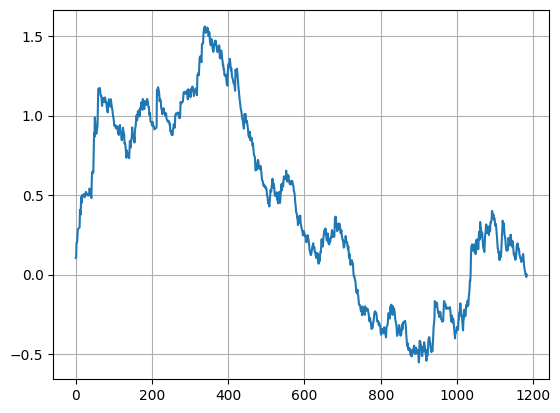

In [280]:
simple_regr_res = y - results.fittedvalues
sum_regr_res=np.cumsum(simple_regr_res)
sigma=np.std(simple_regr_res)
emp_bridge=sum_regr_res/len(sum_regr_res)**0.5/sigma

plt.plot(emp_bridge)
plt.grid()
plt.show()

In [281]:
model = OLS(y_log, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     2050.
Date:                Wed, 18 Dec 2024   Prob (F-statistic):               0.00
Time:                        20:35:06   Log-Likelihood:                 65.137
No. Observations:                1129   AIC:                            -120.3
Df Residuals:                    1124   BIC:                            -95.13
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -150.6538      4.443    -33.910

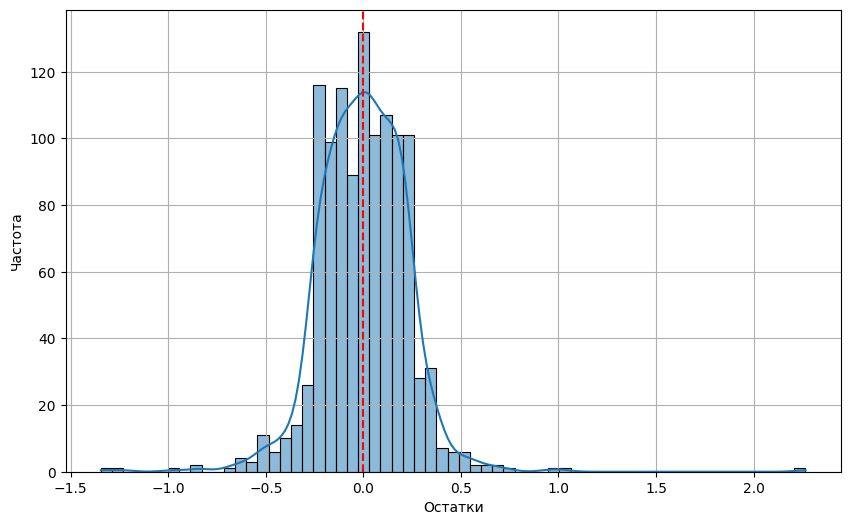

In [282]:
plt.figure(figsize=(10, 6))
sns.histplot(results.resid, kde=True)
plt.xlabel("Остатки")
plt.ylabel("Частота")
plt.axvline(0, color="red", linestyle="--")
plt.grid()
plt.show()

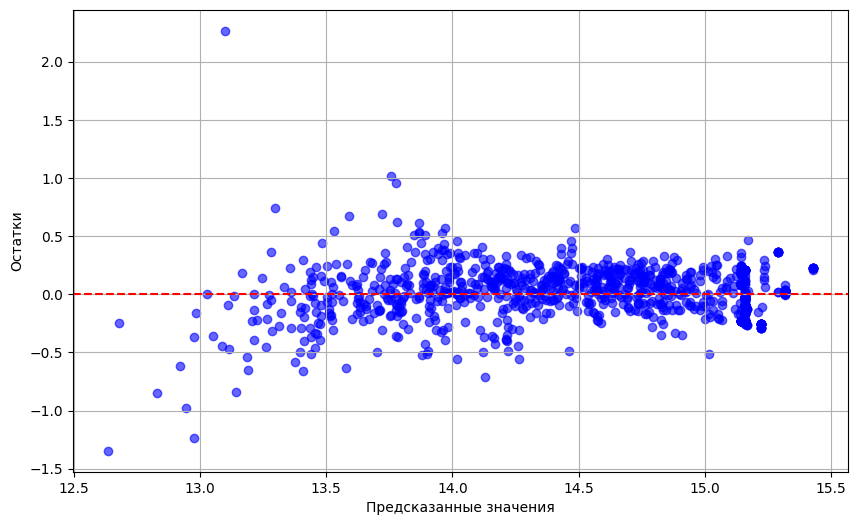

In [283]:
plt.figure(figsize=(10, 6))
plt.scatter(results.fittedvalues, results.resid, c="blue", alpha=0.6)
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.axhline(0, color="red", linestyle="--")
plt.grid()
plt.show()

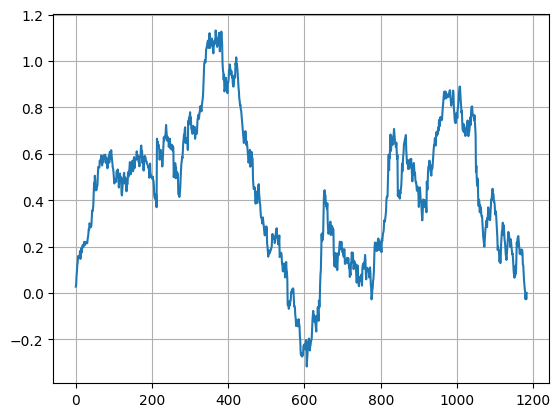

In [284]:
simple_regr_res = y_log - results.fittedvalues
sum_regr_res=np.cumsum(simple_regr_res)
sigma=np.std(simple_regr_res)
emp_bridge=sum_regr_res/len(sum_regr_res)**0.5/sigma

plt.plot(emp_bridge)
plt.grid()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     2050.
Date:                Wed, 18 Dec 2024   Prob (F-statistic):               0.00
Time:                        20:35:08   Log-Likelihood:                 65.137
No. Observations:                1129   AIC:                            -120.3
Df Residuals:                    1124   BIC:                            -95.13
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -150.6538      4.443    -33.910

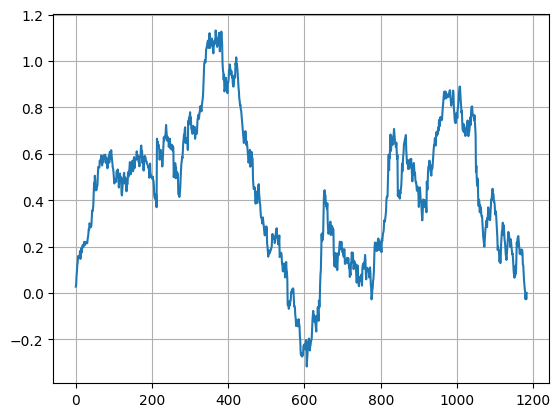

In [285]:
data_sorted = data_cleaned.sort_values(by="km_age", inplace=False)
y_log_ = np.log(data_sorted.price)

X = add_constant(data_sorted[["km_age", "engine_power", "engine_volume", "year"]])
model = OLS(y_log_, X)
results = model.fit()
print(results.summary())

simple_regr_res = y_log_ - results.fittedvalues
simple_regr_res.sort_index(inplace=True)
sum_regr_res = np.cumsum(simple_regr_res)
sigma = np.std(simple_regr_res)
emp_bridge = sum_regr_res / len(sum_regr_res) ** 0.5 / sigma

emp_bridge_temp = emp_bridge

plt.plot(emp_bridge)
plt.grid()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     2050.
Date:                Wed, 18 Dec 2024   Prob (F-statistic):               0.00
Time:                        20:35:08   Log-Likelihood:                 65.137
No. Observations:                1129   AIC:                            -120.3
Df Residuals:                    1124   BIC:                            -95.13
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -150.6538      4.443    -33.910

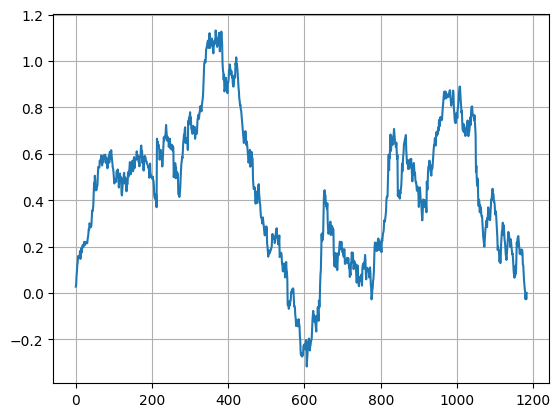

In [286]:
data_sorted = data_cleaned.sort_values(by="engine_power", inplace=False)
y_log_ = np.log(data_sorted.price)

X = add_constant(data_sorted[["km_age", "engine_power", "engine_volume", "year"]])
model = OLS(y_log_, X)
results = model.fit()
print(results.summary())

simple_regr_res = y_log_ - results.fittedvalues
simple_regr_res.sort_index(inplace=True)
sum_regr_res = np.cumsum(simple_regr_res)
sigma = np.std(simple_regr_res)
emp_bridge = sum_regr_res / len(sum_regr_res) ** 0.5 / sigma

plt.plot(emp_bridge)
plt.grid()
plt.show()

In [287]:
emp_bridge_temp - emp_bridge

0       7.372922e-14
1       1.551120e-13
2       2.249867e-13
3       3.062411e-13
4       3.836653e-13
            ...     
1179    8.779201e-11
1180    8.787756e-11
1181    8.795879e-11
1182    8.804051e-11
1183    8.811795e-11
Length: 1129, dtype: float64

In [288]:
n = 200
squared_deviation = []
for _ in range(n):
    data_train = data_cleaned.sample(frac=0.80)
    data_test = data_cleaned.drop(data_train.index)

    x_train = add_constant(
        data_train[["km_age", "engine_power", "engine_volume", "year"]]
    )
    y_train = np.log(data_train.price)
    x_test = add_constant(
        data_test[["km_age", "engine_power", "engine_volume", "year"]]
    )
    y_test = np.log(data_test.price)

    model = OLS(y_train, x_train).fit()
    y_pred = model.predict(x_test)
    squared_deviation.append(np.mean((y_test - y_pred) ** 2))

squared_deviation = np.array(squared_deviation)
variance = np.var(model.resid)
mean_squared_deviation = np.mean(squared_deviation)
ratio = mean_squared_deviation / variance

print(
    f"Среднее значение квадрата отклонения (MSE) по контрольной группе: {mean_squared_deviation}"
)
print(f"Выборочная дисперсия регрессионных остатков: {variance}")
print(f"Отношение MSE к выборочной дисперсии: {ratio}")

Среднее значение квадрата отклонения (MSE) по контрольной группе: 0.05503537276948476
Выборочная дисперсия регрессионных остатков: 0.05349978273946945
Отношение MSE к выборочной дисперсии: 1.0287027339436732


In [289]:
X = data_cleaned[["km_age"]]
print(cross_val_score(LinearRegression(), X, y_log, cv=5, scoring="r2").mean())

X = data_cleaned[["engine_power"]]
print(cross_val_score(LinearRegression(), X, y_log, cv=5, scoring="r2").mean())

X = data_cleaned[["engine_volume"]]
print(cross_val_score(LinearRegression(), X, y_log, cv=5, scoring="r2").mean())

X = data_cleaned[["year"]]
print(cross_val_score(LinearRegression(), X, y_log, cv=5, scoring="r2").mean())

0.6679668071413649
0.09964860943039547
0.10282420436698277
0.8350498566317197
